# Assignment 2
## Naive Bayes Classifier

## Student Details (1 Point)

First Student Name and ID: Venkata Sravanthi Pasam 1001856459 <br>
Second Student Name and ID: Kartik Kataria 1001944865 <br>
Third Student Name and ID: Suraj Pawar Vadeghar 1002021883



Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

# Remeber to cite any external sources here

# Naive Bayes-

## Programming Assignment Details-

## Preprocessing-
You have textual data that you cannot feed into the model. Therefore, you need to extract features from the text (email) and transform the data. There are techniques to do so, such as Bag of Words, n-grams, Tf-Idf, Word2Vec, CountVectorizer, and many others.

## The Model-
Test train split, using 80% for training, rest for testing. Next you will need to train NB model(Gausian) for classification.

Create the model using training data, predict on the test data, and get the accuracy, plot the confusion matrix.

## Metrics to report- 
You will need to report-
1. Accuracy Score(metrics.accuracy_score)
2. Confusion Matrix(metrics.confusion_matrix) plotted graphically(It needs to be in the final jupyter file which you submit)

## Answer the following questions-
Do not include too much information, it has to be consise. Just your student ids, and the necessary info.
1. Briefly explain your approach, any preprocessing, explain the output, any visualisation for explanation, in same jupyter file. (3-4 paragraphs max)

## Grading-
1. (30 pts) Loading and preprocessing of the data.
2. (30 pts) Creation of correct model(NB), with decent metrics, plotting confusion matrix.
3. (30 pts) Explaining the approach, also explain the(if any) preprocessor which you used.
4. (7 pts) Neatly presented code, with comments, correctly named files, complete report section, and followed the UTA code of conduct.

## Programming Assignment Submission Instructions (2 Points)
Each file should be submitted separately, do not compress them, only one student submits.

Format of file naming:

NB-
'yourLastName_Last4digitsofyourID_NB.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)

## What to submit-
1. Jupyter files(.ipynb)

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import pandas as pd

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Any other relevant import for feature extraction
from sklearn.metrics import accuracy_score
import seaborn as sns

#For feature extraction we are using CountVectorizer library
from sklearn.feature_extraction.text import CountVectorizer
import re
import string


In [69]:
# Preprocess

#Reading NB dataset
nb_df=pd.read_csv('dataset_NB.csv')

#Removing null values
enriched_nb_df=nb_df[nb_df['email'].notna()]

#storing Label(independent variable) to y 
y=enriched_nb_df['label']

# Vecotrizing X using feature extraction method - CountVectorizer
def vectorize_x(enriched_nb_df):

    vc = CountVectorizer()
    X = vc.fit_transform(enriched_nb_df['email'])
    return X
# transformed_df = pd.DataFrame(X.toarray(), columns=vc.get_feature_names())
# transformed_df

In [70]:
#GNB Model which splits , trains and plots the metrics - accuracy and confusion matrix

def GNB_Model(X,y):
    
    # train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
    gnaive_bayes = GaussianNB()
    
    #Training Data using NB instance
    gnaive_bayes.fit(X_train.toarray(), y_train)
    
    #Predicting using the trained model
    y_pred = gnaive_bayes.predict(X_test.toarray())
    
    # Metrics and plots
    accuracy = accuracy_score(y_test, y_pred)
    confusn_matrx = confusion_matrix(y_test, y_pred)
    print(f" Accuracy is - {accuracy}\n")

    print("\n Confusion matrix - ")
    sns.heatmap(confusn_matrx, cmap='magma', fmt='g',annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [71]:
#Calling vecotirze function on refined_df

X=vectorize_x(enriched_nb_df)


 Accuracy is - 0.9416666666666667


 Confusion matrix - 


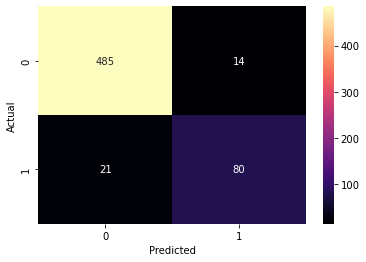

In [72]:
#Calling GNB_Model function on vectorized input (dependent) variable

GNB_Model(X,y)

In [73]:
# Extra - Can you do better?

# https://www.geeksforgeeks.org/python-lemmatization-with-nltk/

from nltk.stem import WordNetLemmatizer

In [74]:

lm = WordNetLemmatizer()

enriched_nb_df['email'] = enriched_nb_df['email'].apply(lambda dat: ' '.join([lm.lemmatize(x) for x in dat.split()]))


/var/folders/81/yfl66q1s6cb619bncv6tnbl80000gn/T/ipykernel_74458/3947450247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enriched_nb_df['email'] = enriched_nb_df['email'].apply(lambda dat: ' '.join([lm.lemmatize(x) for x in dat.split()]))


In [75]:
X3=vectorize_x(enriched_nb_df)


 Accuracy is - 0.9416666666666667


 Confusion matrix - 


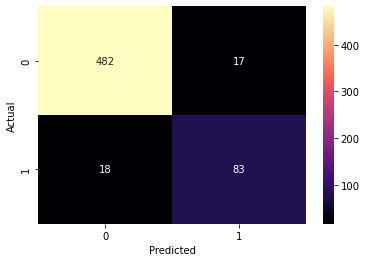

In [76]:
GNB_Model(X3,y)

# WordNetLemmatizer

WordNetLemmatizer determines the base form of any word given and reduces it dimensionality which helps in improving the accuracy and thereby reducing complexity.

In the above confusion matrix the overall accuracy is same as previous but if you observe the false negative they have gone down and false positive in increased. This is acceptable in scenarios such as patient disease prediction where a false negative may be dangerous but a false positive is acceptable and doesnt endanger the life of the patient,

### Team contribution

Kartik Kataria : Worked on the Nearest Neighbor classifier part of the assignment

Pasam Venkata Sravanthi : Focused on the Decision Tree classifier

Suraj Pawar Vadeghar : Dealt with Naive Bayes classifier in the assignment.